<a href="https://colab.research.google.com/github/namita0210/Audio-data-analysis-with-pytorch/blob/main/Exploring_inbuilt_audio_%26_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
import os
import IPython as ipd
import torch.optim as optim
import sys
from tqdm import tqdm
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import torchaudio.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)
import torch.nn as nn
print(torchaudio.__version__)
import torch.nn.functional as F

2.1.0+cu121
2.1.0+cu121


#Load the data

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
os.makedirs('data' , exist_ok=True)

In [3]:
data = datasets.SPEECHCOMMANDS(root='data', download=True)
print(data)

100%|██████████| 2.26G/2.26G [01:04<00:00, 37.5MB/s]


#Split the data - train , test , validate

In [5]:
from torchaudio.datasets import SPEECHCOMMANDS
import os


class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

100%|██████████| 2.26G/2.26G [01:02<00:00, 38.9MB/s]


#Explore the data

In [6]:
sample, sample_rate, label,speaker_id,utterance_number = train_set[0]
print(f'''
Tensor waveform of audio sample: {sample}
Sample rate: {sample_rate}
Label: {label}
Speaker ID: {speaker_id}
Utterance number: {utterance_number}
''')


Tensor waveform of audio sample: tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]])
Sample rate: 16000
Label: backward
Speaker ID: 0165e0e8
Utterance number: 0



In [7]:
num_samples = len(train_set)
print(f"Number of samples in training set: {num_samples}")

num_samples_test = len(test_set)
print(f"Number of samples in test set: {num_samples_test}")

total_num_samples = len(data)
print(f"Number of samples in total data set: {total_num_samples}")

Number of samples in training set: 84843
Number of samples in test set: 11005
Number of samples in total data set: 105829


In [8]:
#shape of the tensor
sample.shape

torch.Size([1, 16000])

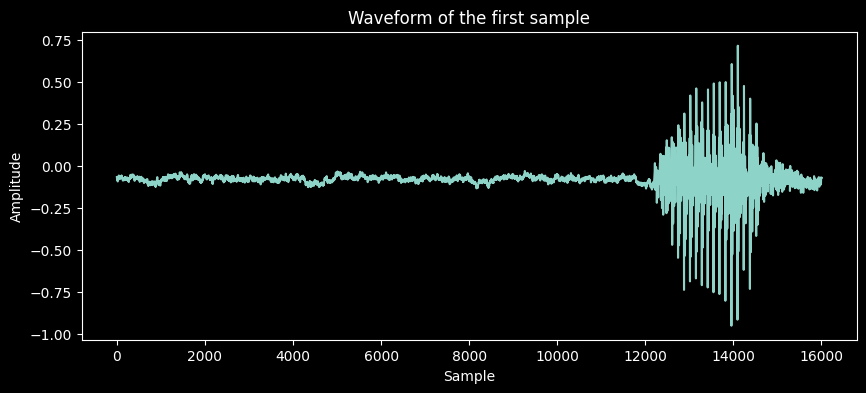

In [9]:
#Waveform of first sample
plt.style.use('dark_background')
plt.figure(figsize=(10,4))
plt.plot(sample.t().numpy()) #transform leke numpy me convert krke plot krdiya
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform of the first sample')
plt.show()

In [ ]:
# unique_labels = set()
# for waveform, _, label , _ , _ in data:
#   unique_labels.add(label)

# print(unique_labels)
# #{'bed', 'wow', 'seven', 'eight', 'left', 'marvin', 'one', 'three', 'go', 'nine', 'stop', 'dog', 'on', 'up', 'sheila', 'house', 'right', 'zero', 'backward', 'happy', 'bird', 'off', 'six', 'tree', 'four', 'cat', 'follow', 'forward', 'learn', 'five', 'yes', 'down', 'two', 'no', 'visual'}

In [10]:
labels = ['bed', 'wow', 'seven', 'eight', 'left', 'marvin', 'one', 'three', 'go', 'nine', 'stop', 'dog', 'on', 'up', 'sheila', 'house', 'right', 'zero', 'backward', 'happy', 'bird', 'off', 'six', 'tree', 'four', 'cat', 'follow', 'forward', 'learn', 'five', 'yes', 'down', 'two', 'no', 'visual' ]
labels = sorted(labels)
print(labels)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [11]:
waveform_first, *_ = train_set[0]
ipd.display.Audio(waveform_first.numpy(), rate=sample_rate)

In [12]:
waveform_second, *_ = train_set[1]
ipd.display.Audio(waveform_second.numpy(), rate=sample_rate)

In [13]:
waveform_last, *_ = train_set[-1]
ipd.display.Audio(waveform_last.numpy(), rate=sample_rate)

In [14]:
ipd.display.Audio(sample.numpy(), rate=sample_rate)

In [15]:
def plot_specgram(waveform, sample_rate, title='Spectrogram'):
    waveform = waveform.numpy()
    plt.figure(figsize=(10, 4))
    plt.specgram(waveform[0], Fs=sample_rate)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar().set_label('Intensity (dB)')
    plt.show()


In [16]:
i = 1
print(data[i])

(tensor([[-0.0003, -0.0002, -0.0005,  ...,  0.0005,  0.0007,  0.0010]]), 16000, 'backward', '017c4098', 0)


In [17]:
label = (data[0][2])
waveform = data[0][0]
sample_rate = data[0][1]

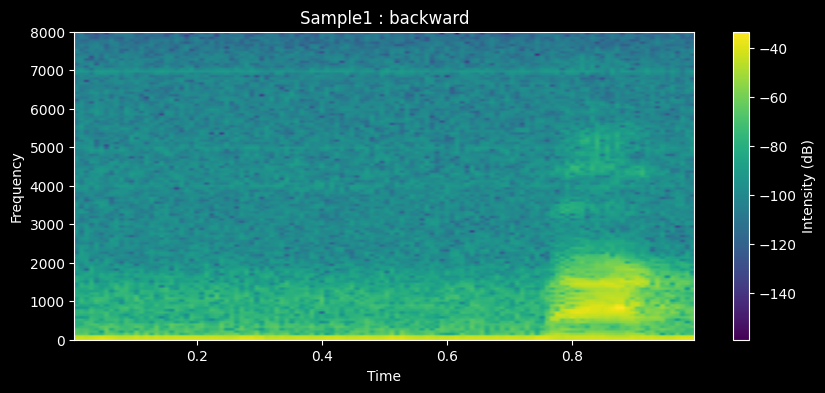

In [18]:
plot_specgram(waveform , sample_rate , title = f"Sample{i} : {label}")
ipd.display.Audio(waveform, rate = sample_rate)

#Formatting the data

In [19]:
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(sample)
ipd.display.Audio(transformed.numpy(), rate=new_sample_rate)

#Encoding each word using its index in the list of labels

In [20]:
def label_to_index(word):
    # Return the position of the word in labels
    return torch.tensor(labels.index(word))


def index_to_label(index):
    # Return the word corresponding to the index in labels
    # This is the inverse of label_to_index
    return labels[index]


In [21]:
word_start = "yes"
index = label_to_index(word_start)
word_recovered = index_to_label(index)
print(word_start, "-->", index, "-->", word_recovered)

yes --> tensor(33) --> yes


In [24]:
def pad_sequence(batch):
    # Make all tensor in a batch the same length by padding with zeros
    batch = [item.t() for item in batch]
    batch = torch.nn.utils.rnn.pad_sequence(batch, batch_first=True, padding_value=0.)
    return batch.permute(0, 2, 1)


def collate_fn(batch):

    # A data tuple has the form:
    # waveform, sample_rate, label, speaker_id, utterance_number

    tensors, targets = [], []

    # Gather in lists, and encode labels as indices
    for waveform, _, label, *_ in batch:
        tensors += [waveform]
        targets += [label_to_index(label)]

    # Group the list of tensors into a batched tensor
    tensors = pad_sequence(tensors)
    targets = torch.stack(targets)

    return tensors, targets


batch_size = 256

if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=collate_fn,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

#Define the network

In [29]:
class M5(nn.Module):
    def __init__(self, n_input=1, n_output=35, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(2 * n_channel, n_output)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=2)


model = M5(n_input=transformed.shape[0], n_output=len(labels))
model.to(device)
print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


n = count_parameters(model)
print("Number of parameters: %s" % n)

M5(
  (conv1): Conv1d(1, 32, kernel_size=(80,), stride=(16,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 32, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=35, bias=True)
)
Numbe

In [30]:
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

#Training and testing the network

In [31]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)

        # negative log-likelihood for a tensor of size (batch x 1 x n_output)
        loss = F.nll_loss(output.squeeze(), target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        # update progress bar
        pbar.update(pbar_update)
        # record loss
        losses.append(loss.item())

In [32]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        data = transform(data)
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

In [35]:
log_interval = 20
n_epoch = 2

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

# The transform needs to live on the same device as the model and the data.
transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train(model, epoch, log_interval)
        test(model, epoch)
        scheduler.step()

# Let's plot the training loss versus the number of iteration.
# plt.plot(losses);
# plt.title("training loss");

  0%|          | 0.0026666666666666666/2 [00:02<29:32, 887.43s/it]

Train Epoch: 1 [0/84843 (0%)]	Loss: 3.779649


  3%|▎         | 0.05599999999999999/2 [00:33<18:57, 585.27s/it]

Train Epoch: 1 [5120/84843 (6%)]	Loss: 2.905442


  5%|▌         | 0.10933333333333328/2 [01:04<17:37, 559.19s/it]

Train Epoch: 1 [10240/84843 (12%)]	Loss: 2.621367


  8%|▊         | 0.16266666666666676/2 [01:35<18:27, 603.04s/it]

Train Epoch: 1 [15360/84843 (18%)]	Loss: 2.429968


 11%|█         | 0.21600000000000033/2 [02:06<16:52, 567.70s/it]

Train Epoch: 1 [20480/84843 (24%)]	Loss: 1.958587


 13%|█▎        | 0.2693333333333337/2 [02:37<16:55, 586.88s/it] 

Train Epoch: 1 [25600/84843 (30%)]	Loss: 1.788678


 16%|█▌        | 0.3226666666666667/2 [03:08<16:07, 576.63s/it] 

Train Epoch: 1 [30720/84843 (36%)]	Loss: 1.590186


 19%|█▉        | 0.3759999999999997/2 [03:38<14:44, 544.45s/it]

Train Epoch: 1 [35840/84843 (42%)]	Loss: 1.470810


 21%|██▏       | 0.42933333333333273/2 [04:07<13:54, 531.53s/it]

Train Epoch: 1 [40960/84843 (48%)]	Loss: 1.473302


 24%|██▍       | 0.48266666666666574/2 [04:43<22:10, 877.08s/it]

Train Epoch: 1 [46080/84843 (54%)]	Loss: 1.271581


 27%|██▋       | 0.5359999999999995/2 [05:19<17:33, 719.83s/it]

Train Epoch: 1 [51200/84843 (60%)]	Loss: 1.258192


 29%|██▉       | 0.5893333333333336/2 [05:53<14:27, 614.93s/it]

Train Epoch: 1 [56320/84843 (66%)]	Loss: 1.443089


 32%|███▏      | 0.6426666666666677/2 [06:27<13:56, 616.33s/it]

Train Epoch: 1 [61440/84843 (72%)]	Loss: 1.151127


 35%|███▍      | 0.6960000000000018/2 [07:02<15:13, 700.43s/it]

Train Epoch: 1 [66560/84843 (78%)]	Loss: 1.326069


 37%|███▋      | 0.749333333333336/2 [07:34<12:10, 583.98s/it] 

Train Epoch: 1 [71680/84843 (84%)]	Loss: 1.207001


 40%|████      | 0.8026666666666701/2 [08:08<13:21, 669.51s/it]

Train Epoch: 1 [76800/84843 (90%)]	Loss: 1.059872


 43%|████▎     | 0.8560000000000042/2 [08:40<11:17, 591.83s/it]

Train Epoch: 1 [81920/84843 (96%)]	Loss: 1.121077


 50%|█████     | 1.0000000000000062/2 [09:57<07:55, 475.60s/it]


Test Epoch: 1	Accuracy: 7178/11005 (65%)



 50%|█████     | 1.0026666666666728/2 [09:58<08:10, 491.45s/it]

Train Epoch: 2 [0/84843 (0%)]	Loss: 1.014107


 53%|█████▎    | 1.0560000000000047/2 [10:29<09:14, 587.20s/it]

Train Epoch: 2 [5120/84843 (6%)]	Loss: 1.151789


 55%|█████▌    | 1.1093333333333366/2 [10:59<08:27, 569.97s/it]

Train Epoch: 2 [10240/84843 (12%)]	Loss: 1.037384


 58%|█████▊    | 1.1626666666666685/2 [11:28<07:30, 538.11s/it]

Train Epoch: 2 [15360/84843 (18%)]	Loss: 1.039448


 61%|██████    | 1.2160000000000004/2 [11:58<06:45, 517.07s/it]

Train Epoch: 2 [20480/84843 (24%)]	Loss: 1.071100


 63%|██████▎   | 1.2693333333333323/2 [12:28<07:16, 597.49s/it]

Train Epoch: 2 [25600/84843 (30%)]	Loss: 0.795724


 66%|██████▌   | 1.3226666666666642/2 [12:57<06:10, 547.65s/it]

Train Epoch: 2 [30720/84843 (36%)]	Loss: 1.088893


 69%|██████▉   | 1.3759999999999961/2 [13:27<05:43, 550.64s/it]

Train Epoch: 2 [35840/84843 (42%)]	Loss: 1.127556


 71%|███████▏  | 1.429333333333328/2 [13:58<06:07, 644.39s/it] 

Train Epoch: 2 [40960/84843 (48%)]	Loss: 1.063272


 74%|███████▍  | 1.48266666666666/2 [14:27<04:46, 553.09s/it]  

Train Epoch: 2 [46080/84843 (54%)]	Loss: 0.936570


 77%|███████▋  | 1.5359999999999918/2 [15:04<05:16, 682.70s/it]

Train Epoch: 2 [51200/84843 (60%)]	Loss: 0.813557


 79%|███████▉  | 1.5893333333333237/2 [15:38<04:13, 617.02s/it]

Train Epoch: 2 [56320/84843 (66%)]	Loss: 0.715669


 82%|████████▏ | 1.6426666666666556/2 [16:13<03:54, 654.86s/it]

Train Epoch: 2 [61440/84843 (72%)]	Loss: 0.819211


 85%|████████▍ | 1.6959999999999875/2 [16:46<03:05, 611.16s/it]

Train Epoch: 2 [66560/84843 (78%)]	Loss: 0.865395


 87%|████████▋ | 1.7493333333333194/2 [17:20<02:32, 609.42s/it]

Train Epoch: 2 [71680/84843 (84%)]	Loss: 0.762402


 90%|█████████ | 1.8026666666666513/2 [17:52<02:09, 655.45s/it]

Train Epoch: 2 [76800/84843 (90%)]	Loss: 0.726296


 93%|█████████▎| 1.8559999999999832/2 [18:24<01:21, 567.99s/it]

Train Epoch: 2 [81920/84843 (96%)]	Loss: 0.928202


100%|█████████▉| 1.9999999999999793/2 [19:40<00:00, 590.32s/it]


Test Epoch: 2	Accuracy: 7078/11005 (64%)



In [37]:
def predict(tensor):
    # Use the model to predict the label of the waveform
    tensor = tensor.to(device)
    tensor = transform(tensor)
    tensor = model(tensor.unsqueeze(0))
    tensor = get_likely_index(tensor)
    tensor = index_to_label(tensor.squeeze())
    return tensor


waveform, sample_rate, utterance, *_ = train_set[-1]
ipd.display.Audio(waveform.numpy(), rate=sample_rate)

print(f"Expected: {utterance}. Predicted: {predict(waveform)}.")

Expected: zero. Predicted: sheila.


In [39]:
for i, (waveform, sample_rate, utterance, *_) in enumerate(test_set):
    output = predict(waveform)
    if output != utterance:
        ipd.display.Audio(waveform.numpy(), rate=sample_rate)
        print(f"Data point #{i}. Expected: {utterance}. Predicted: {output}.")
        break
else:
    print("All examples in this dataset were correctly classified!")
    print("In this case, let's just look at the last data point")
    ipd.Audio(waveform.numpy(), rate=sample_rate)
    print(f"Data point #{i}. Expected: {utterance}. Predicted: {output}.")

Data point #1. Expected: right. Predicted: nine.


In [41]:
!pip install pydub

In [44]:
def record(seconds=1):
    from google.colab import output as colab_output
    from base64 import b64decode
    from io import BytesIO
    from pydub import AudioSegment

    RECORD = (
        b"const sleep  = time => new Promise(resolve => setTimeout(resolve, time))\n"
        b"const b2text = blob => new Promise(resolve => {\n"
        b"  const reader = new FileReader()\n"
        b"  reader.onloadend = e => resolve(e.srcElement.result)\n"
        b"  reader.readAsDataURL(blob)\n"
        b"})\n"
        b"var record = time => new Promise(async resolve => {\n"
        b"  stream = await navigator.mediaDevices.getUserMedia({ audio: true })\n"
        b"  recorder = new MediaRecorder(stream)\n"
        b"  chunks = []\n"
        b"  recorder.ondataavailable = e => chunks.push(e.data)\n"
        b"  recorder.start()\n"
        b"  await sleep(time)\n"
        b"  recorder.onstop = async ()=>{\n"
        b"    blob = new Blob(chunks)\n"
        b"    text = await b2text(blob)\n"
        b"    resolve(text)\n"
        b"  }\n"
        b"  recorder.stop()\n"
        b"})"
    )
    RECORD = RECORD.decode("ascii")

    print(f"Recording started for {seconds} seconds.")
    colab_output.eval_js(RECORD)
    s = colab_output.eval_js("record(%d)" % (seconds * 1000))
    print("Recording ended.")
    b = b64decode(s.split(",")[1])

    fileformat = "wav"
    filename = f"_audio.{fileformat}"
    AudioSegment.from_file(BytesIO(b)).export(filename, format=fileformat)
    return torchaudio.load(filename)


# Detect whether notebook runs in google colab
if "google.colab" in sys.modules:
    waveform, sample_rate = record()
    print(f"Predicted: {predict(waveform)}.")
    ipd.display.Audio(waveform.numpy(), rate=sample_rate)


Recording started for 1 seconds.
Recording ended.
Predicted: bird.


START

In [ ]:
class PhonemeRecognizer(tf.keras.Model):
    def __init__(self, num_phonemes):
        super(PhonemeRecognizer, self).__init__()
        self.conv1d_layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')
        self.pooling_layer = tf.keras.layers.MaxPooling1D(pool_size=2)
        self.flatten_layer = tf.keras.layers.Flatten()
        self.dense_layer = tf.keras.layers.Dense(units=num_phonemes, activation='softmax')
        
    def call(self, inputs):
        x = self.conv1d_layer(inputs)
        x = self.pooling_layer(x)
        x = self.flatten_layer(x)
        output = self.dense_layer(x)
        return output

In [ ]:
# Define the Pronunciation Model (PM) architecture
class PronunciationModel(tf.keras.Model):
    def __init__(self, num_phonemes, embedding_dim):
        super(PronunciationModel, self).__init__()
        self.embedding_layer = tf.keras.layers.Embedding(input_dim=num_phonemes, output_dim=embedding_dim)
        self.lstm_layer = tf.keras.layers.LSTM(units=128, return_sequences=True)
        self.dense_layer = tf.keras.layers.Dense(units=num_phonemes, activation='softmax')
        
    def call(self, inputs):
        acoustic_features, auxiliary_embeddings = inputs
        
        # Pass the acoustic features through the embedding layer
        acoustic_embeddings = self.embedding_layer(acoustic_features)
        
        # Concatenate the acoustic embeddings with the auxiliary embeddings
        combined_embeddings = tf.concat([acoustic_embeddings, auxiliary_embeddings], axis=-1)
        
        # Pass the combined embeddings through LSTM layer
        lstm_output = self.lstm_layer(combined_embeddings)
        
        # Pass LSTM output through dense layer
        output = self.dense_layer(lstm_output)
        
        return output

In [ ]:
# Define the Pronunciation Error Detector (PED) architecture
class PronunciationErrorDetector(tf.keras.Model):
    def __init__(self):
        super(PronunciationErrorDetector, self).__init__()
        
    def call(self, inputs):
        phonemes, pronunciation_likelihoods, canonical_phonemes = inputs
        
        # Compute the alignment between canonical and recognized phoneme sequences
        # Use dynamic programming algorithm
        
        # Compute the probabilities of mispronunciation
        probabilities = tf.where(tf.equal(aligned_phonemes, recognized_phonemes), 0.0, 1.0 - pronunciation_likelihoods)
        
        return probabilities